# **Bank Churn EDA and Prediction through ML & DL**
Author: **`Usman Tariq`**

[GitHub](https://www.github.com/USM811) &emsp;&emsp;&emsp; [Kaggle](https://www.kaggle.com/usm811)

### **Purpose**

- **Perform Comprehensive EDA**
- **Predict Customer Churn**

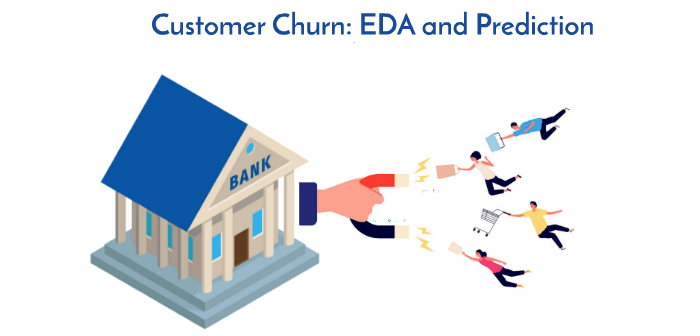

### **About Dataset**

The [dataset](https://www.kaggle.com/competitions/playground-series-s4e1/data) for this competition (both train and test) was generated from a deep learning model trained on the [Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction) dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

### **Columns Descriptions**

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

1. `Customer ID:` A unique identifier for each customer
2. `Surname:` The customer's surname or last name
3. `Credit Score:` A numerical value representing the customer's credit score
4. `Geography:` The country where the customer resides
   - France 
   - Spain 
   - Germany
5. `Gender:` The customer's gender
   - Male
   - Female
6. `Age:` The customer's age.
7. `Tenure:` The number of years the customer has been with the bank
8. `Balance:` The customer's account balance
9.  `NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card)
10. `HasCrCard:` Whether the customer has a credit card 
    - 1 = yes 
    - 0 = no
11. `IsActiveMember:` Whether the customer is an active member
    - 1 = yes 
    - 0 = no
12. `EstimatedSalary:` The estimated salary of the customer
13. `Exited:` Whether the customer has churned
    - 1 = yes 
    - 0 = no

### **Import Libraries**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

### **Import Data**

In [5]:
# import all csv files from data folder
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
churn_modelling = pd.read_csv('/kaggle/input/photo-data/churn_modelling.csv')

### **Data Overview**

&emsp;**Inpect Data Dimenstions**

In [3]:
print(train.shape)

(165034, 14)


In [4]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
churn_modelling.shape

(10002, 14)

In [6]:
churn_modelling.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
test.shape

(110023, 13)

In [8]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


&emsp;**Observations**
> - There are `165034` rows and `14` features in the `training` dataframe.
>
> - There are `110023` rows and `13` features in the `testing` dataframe.
>
> - There are `10002` rows and `14` features in the `churn_modelling` dataframe.

&emsp;**Merge `churn_modeling` df with `train` df**

In [3]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
churn_modelling.drop('RowNumber', axis=1, inplace=True)

In [4]:
train = pd.concat([train, churn_modelling], axis=0)
train.shape

(175036, 13)

In [11]:
train.sample(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
45289,15697035,Lu,715,France,Male,28.0,1,0.0,2,0.0,0.0,162957.82,0
114209,15689425,Hsia,549,France,Male,41.0,9,0.0,2,1.0,0.0,172096.08,0


&emsp;**Drop Duplicate Rows if Any**

In [12]:
print("The duplicated rows in train dataframe are:",train.duplicated().sum(),"\n")

print("The duplicated rows in test dataframe are:",test.duplicated().sum())

The duplicated rows in train dataframe are: 2 



The duplicated rows in test dataframe are: 0


In [5]:
train.drop_duplicates(inplace=True)

&emsp;**Inpect Data Types of Features**

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>

Index: 175034 entries, 0 to 10000

Data columns (total 13 columns):

 #   Column           Non-Null Count   Dtype  

---  ------           --------------   -----  

 0   CustomerId       175034 non-null  int64  

 1   Surname          175034 non-null  object 

 2   CreditScore      175034 non-null  int64  

 3   Geography        175033 non-null  object 

 4   Gender           175034 non-null  object 

 5   Age              175033 non-null  float64

 6   Tenure           175034 non-null  int64  

 7   Balance          175034 non-null  float64

 8   NumOfProducts    175034 non-null  int64  

 9   HasCrCard        175033 non-null  float64

 10  IsActiveMember   175033 non-null  float64

 11  EstimatedSalary  175034 non-null  float64

 12  Exited           175034 non-null  int64  

dtypes: float64(5), int64(5), object(3)

memory usage: 18.7+ MB


&emsp;**Observations**
> - Three featrues [`Surname`,`Geography`, `Gender`] are of the `object` datatype.
>
> - All remaining features are of the `numeric` datatype.

&emsp;**Inspect Missing Values**

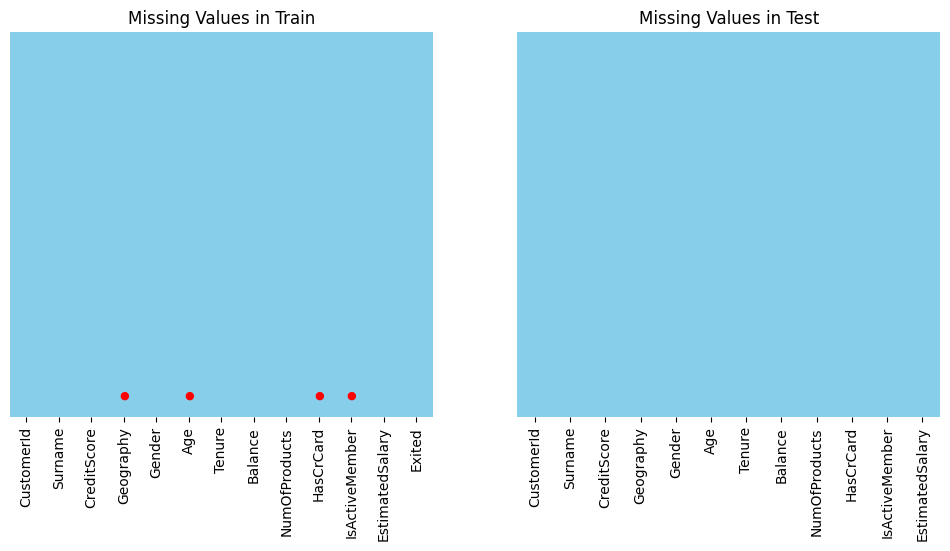

In [15]:
# Define a light blue color for the heatmap and red for missing values
missing_values_color = "#87CEEB"

# Create a ListedColormap with a single color
cmap = ListedColormap([missing_values_color])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot heatmap for train data
sns.heatmap(train.isnull(), cmap=cmap, yticklabels=False, cbar=False, ax=axes[0])
for i, j in zip(*train.isnull().values.nonzero()):
    axes[0].annotate("\u25CF", (j + 0.5, i + 0.5), ha="center", va="center", fontsize=8, color="red")
axes[0].set_title('Missing Values in Train')

# Plot heatmap for test data
sns.heatmap(test.isnull(), cmap=cmap, yticklabels=False, cbar=False, ax=axes[1])
for i, j in zip(*test.isnull().values.nonzero()):
    axes[1].annotate("\u25CF", (j + 0.5, i + 0.5), ha="center", va="center", fontsize=8, color="red")
axes[1].set_title('Missing Values in Test')

plt.show()


In [16]:
print("Missing Values in train dataframe:")
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

Missing Values in train dataframe:


Geography         1
Age               1
HasCrCard         1
IsActiveMember    1
dtype: int64

In [17]:
print("Missing Values in test dataframe:")
round(test.isnull().sum()[test.isnull().sum()>0]).sort_values(ascending=False)

Missing Values in test dataframe:


Series([], dtype: int64)

&emsp;**Observations**
> - Four featrues having missing value(s) in the `train` data.
> [`Geography`, `Age`, `HasCrCard`, `IsActiveMember`]
>
> - Only one missing value in each featre mentioned above.
>
> - No missing data in the `test` data.

&emsp;**Impute the Missing Data**

In [6]:
# Impute the missing value in 'Age' column with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Impute the missing values in 'Geography', 'HasCrCard', 'IsActiveMember' columns with the mode
train['Geography'].fillna(train['Geography'].mode()[0], inplace=True)
test['Geography'].fillna(test['Geography'].mode()[0], inplace=True)
train['HasCrCard'].fillna(train['HasCrCard'].mode()[0], inplace=True)
test['HasCrCard'].fillna(test['HasCrCard'].mode()[0], inplace=True)
train['IsActiveMember'].fillna(train['IsActiveMember'].mode()[0], inplace=True)
test['IsActiveMember'].fillna(test['IsActiveMember'].mode()[0], inplace=True)

&emsp;**Identify the Continuous Numeric Features**

In [19]:
# display the unique values of each feature in the train dataframe
train.nunique()

CustomerId         23421
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance            30239
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55581
Exited                 2
dtype: int64

In [20]:
continuous_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

&emsp;**Summary of the Continuous Numeric Features**

In [21]:
train[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,175034.0,656.115835,81.151171,350.00,597.00,659.00,710.0000,850.00
Age,175034.0,38.171423,8.969512,18.00,32.00,37.00,42.0000,92.00
Balance,175034.0,56678.299368,62982.565768,0.00,0.00,0.00,120729.2975,250898.09
EstimatedSalary,175034.0,111861.556577,50815.382991,11.58,73192.37,116969.73,154767.3400,199992.48


In [22]:
# find the number of observation where the balance is 0
zero_balance_customers = train[train['Balance'] == 0].shape[0]
print("There are", zero_balance_customers ,"("+ str(round((zero_balance_customers/len(train))*100)) + "%) customers with zero balance in their accounts.")

There are 93265 (53%) customers with zero balance in their accounts.


&emsp;**Observations**
> - `More than 50%` of the customers `with zero balance`, representing the `high biasness` in the `Balance` feature.
>
> - Summary represents that there are `no anomalies in other features`.

&emsp;**Plot the Distributions & Boxplots of the Continuous Numeric Features**

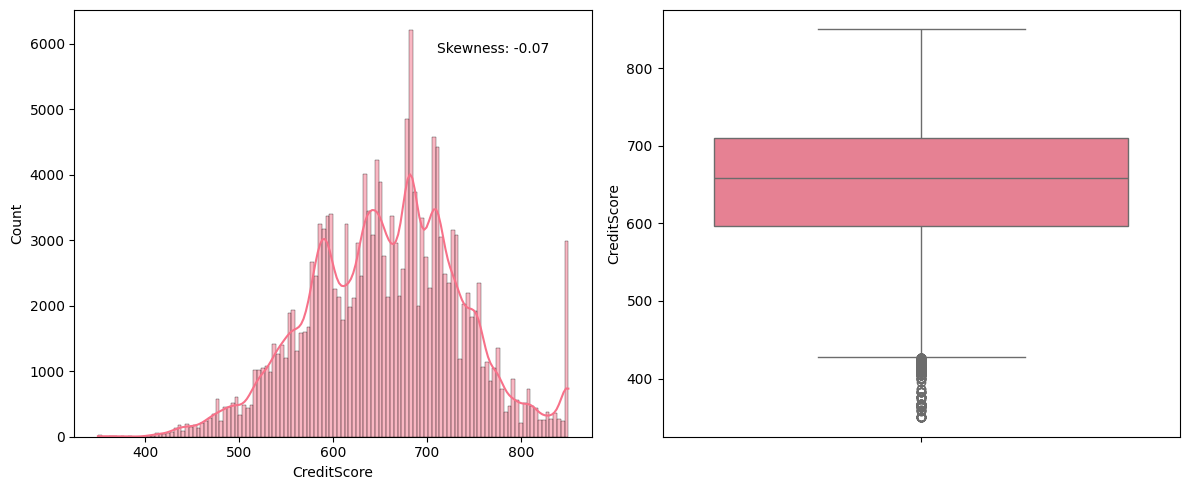

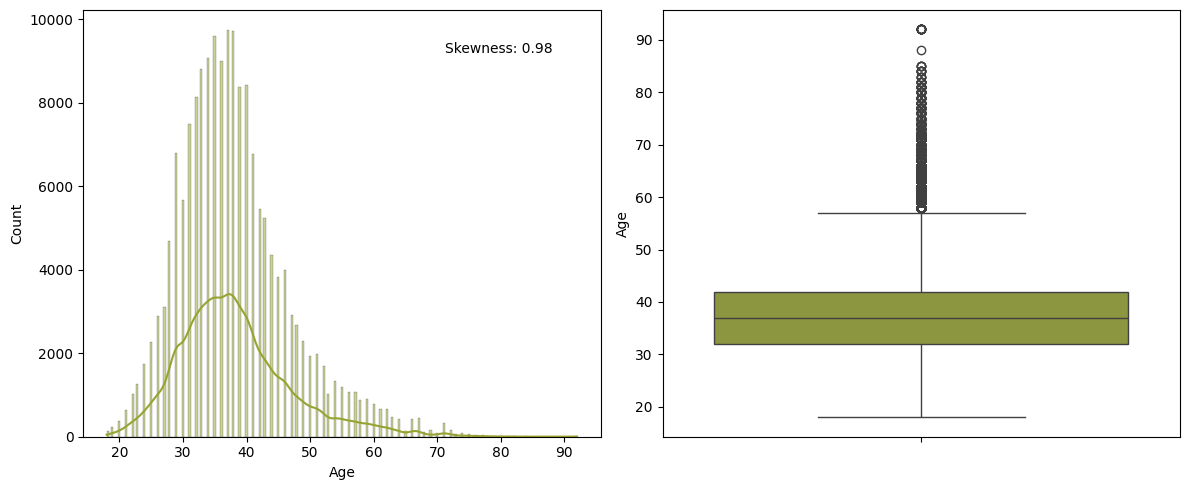

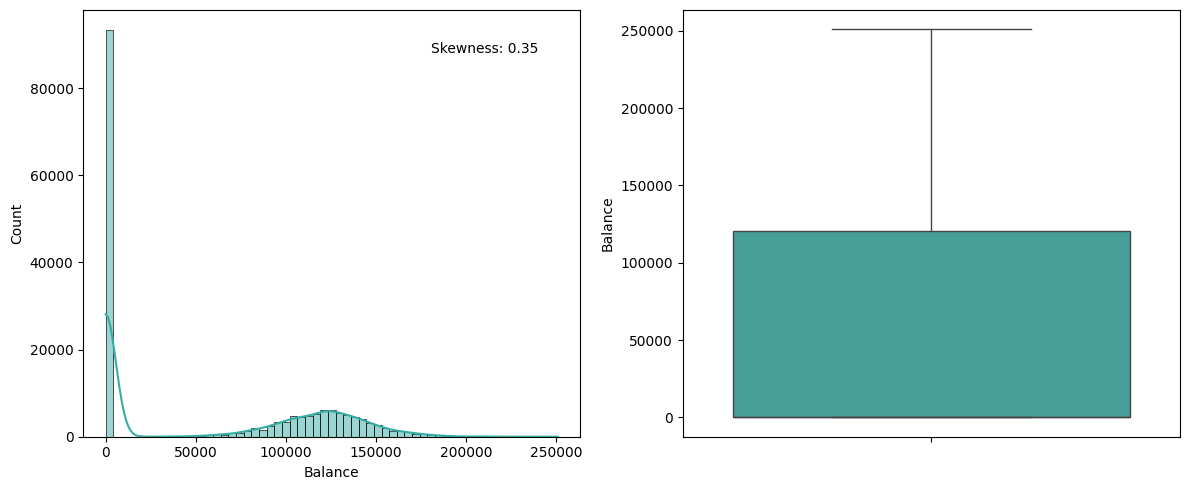

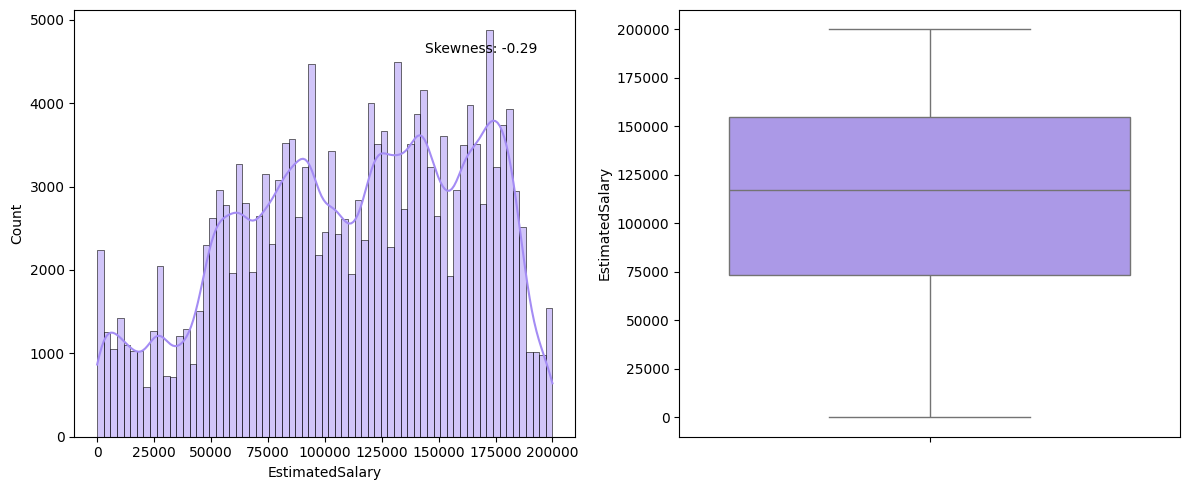

In [23]:
custom_palette = sns.color_palette("husl", n_colors=4)

for i, (col, color) in enumerate(zip(continuous_features, custom_palette)):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(train[col], kde=True, ax=axes[0], color=color)
    skewness = skew(train[col])
    axes[0].text(0.70, 0.9, f'Skewness: {skewness:.2f}', transform=axes[0].transAxes)
    sns.boxplot(train[col], ax=axes[1], color=color)
    plt.tight_layout()
    plt.show()

&emsp;**Observations**
> - `CreditScore` distributed near to normal distribution, but contains couple of outliers.
>
> - `Age` distributed right skewed with high kurtosis and also contains couple of outliers.
>
> - `Balance` distribution is have no clear shape because more than 50% customers having less than 25k balance.
> No oultier found in this column.
>
> - `EstimatedSalary` of most customers between 75k to 150k.
> No outlier found in this column and no clear shape of distribution.

&emsp;**Plot the Countplots of the Categorical Numeric Features**

In [24]:
discrete_features = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

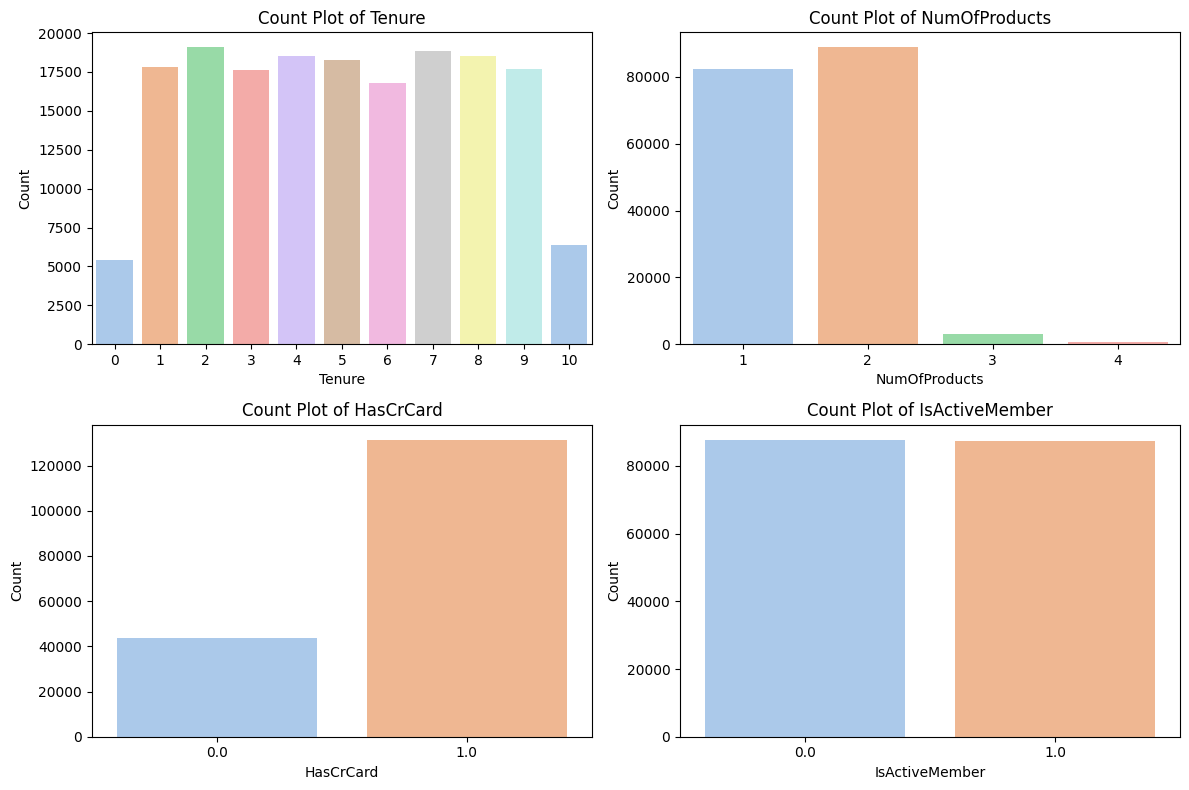

In [25]:
# Set the number of columns and rows for subplots
num_cols = 2
num_rows = len(discrete_features) // num_cols + len(discrete_features) % num_cols

# Create a custom color palette
custom_palette = sns.color_palette("pastel")

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Flatten the axes array to facilitate indexing
axes = axes.flatten()

# Loop through each discrete feature and plot the count plot
for i, feature in enumerate(discrete_features):
    sns.countplot(x=feature, data=train, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

&emsp;**Observations**
> - The `numbers of customers` w.r.t `retention-duration` in year (1 to 9 years) are `almost equal`.
>
> - Most of the customers uses `at least two` bank products.
>
> - Most of the customers `have the credic cards`.
>
> - The number of `active & non-active` customers are almost equal.

&emsp;**Plot the Pie Charts of the Categorical Object Features**

In [26]:
categorical_features = ['Geography', 'Gender']

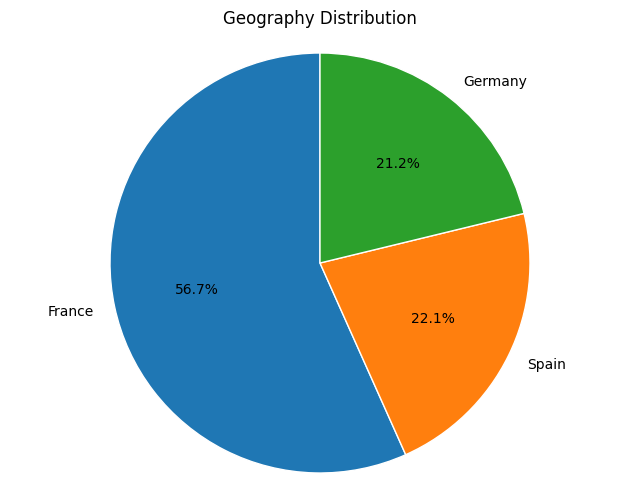

In [27]:
geography_counts = train['Geography'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', 
            startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Geography Distribution')
plt.axis('equal')
plt.show()

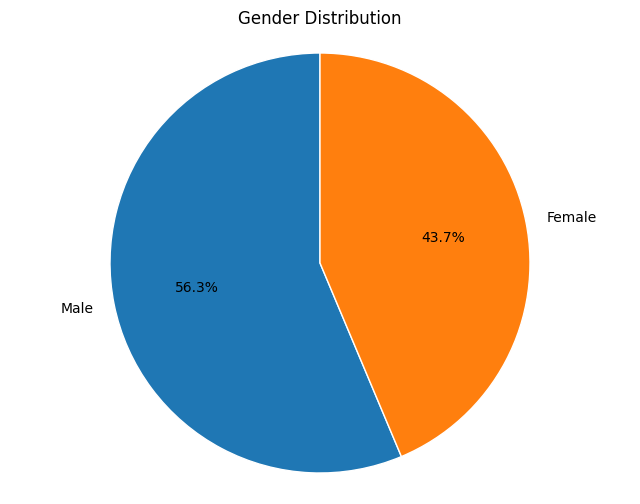

In [28]:
# plot the pie chart of 'Gender' 
gender_counts = train['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
            startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

&emsp;**Observations**
> - Most of the customers in the dataset belongs to the `France`.
>
> - There are `more male customers` than female customers.

&emsp;**Study the Categorical Features w.r.t Target Feature**

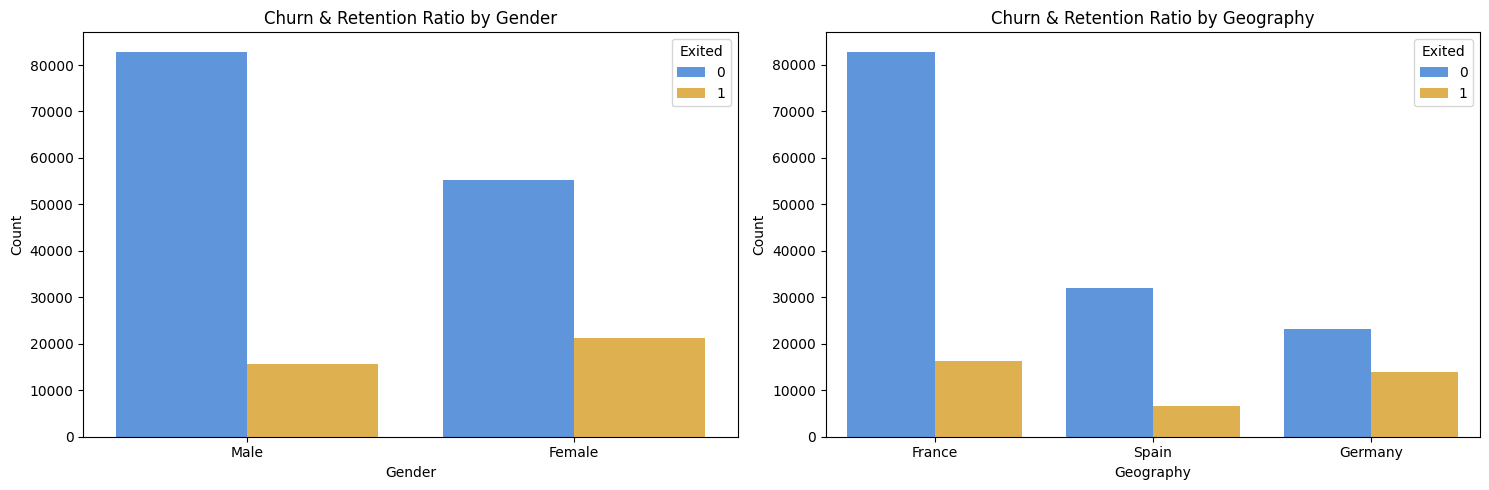

In [29]:
colors = ['#4992F0', '#F7B838', '#11FFFD', '#FF00DC', 'purple']

# Select three categorical features
categorical_features = ['Gender', 'Geography']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Exited', data=train, palette=colors, ax=axes[i])
    axes[i].set_title(f'Churn & Retention Ratio by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

> - Female churn rate is higher than male churn rate.
> 
> - Most customers in the dataset belongs to the France.

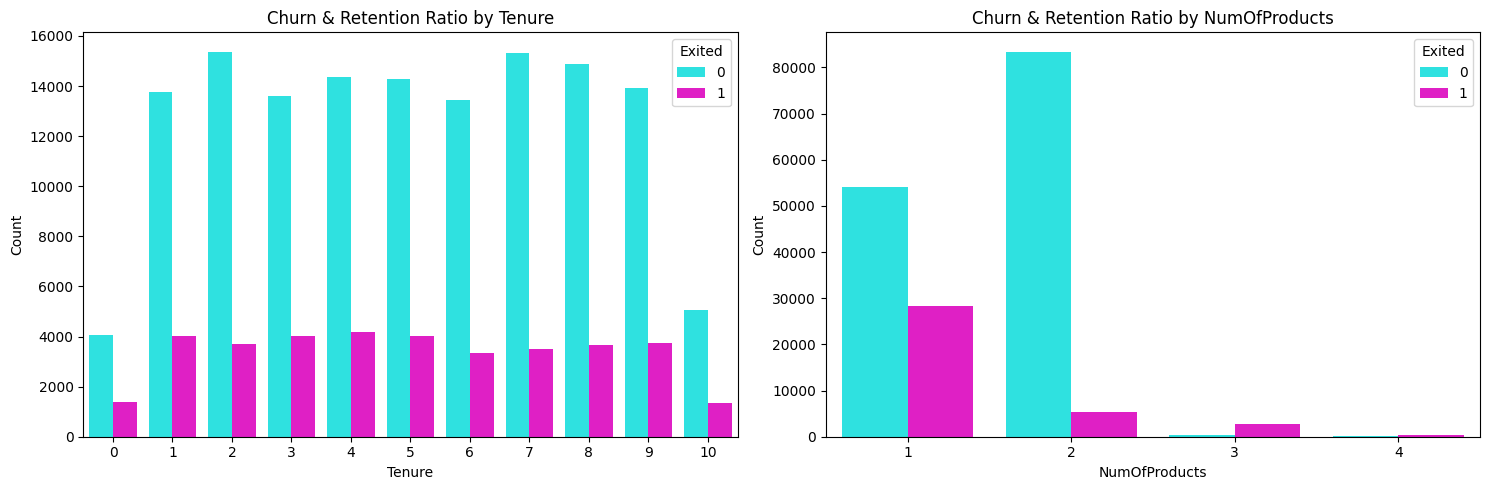

In [30]:
colors = ['#11FFFD', '#FF00DC', 'purple']

# Select three categorical features
categorical_features = ['Tenure', 'NumOfProducts']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Exited', data=train, palette=colors, ax=axes[i])
    axes[i].set_title(f'Churn & Retention Ratio by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

> - The churn rate is same every year (1 to 9 years), reduced in first & 10th years.
>
> - The churn rate is higher in those customers who use only one product.

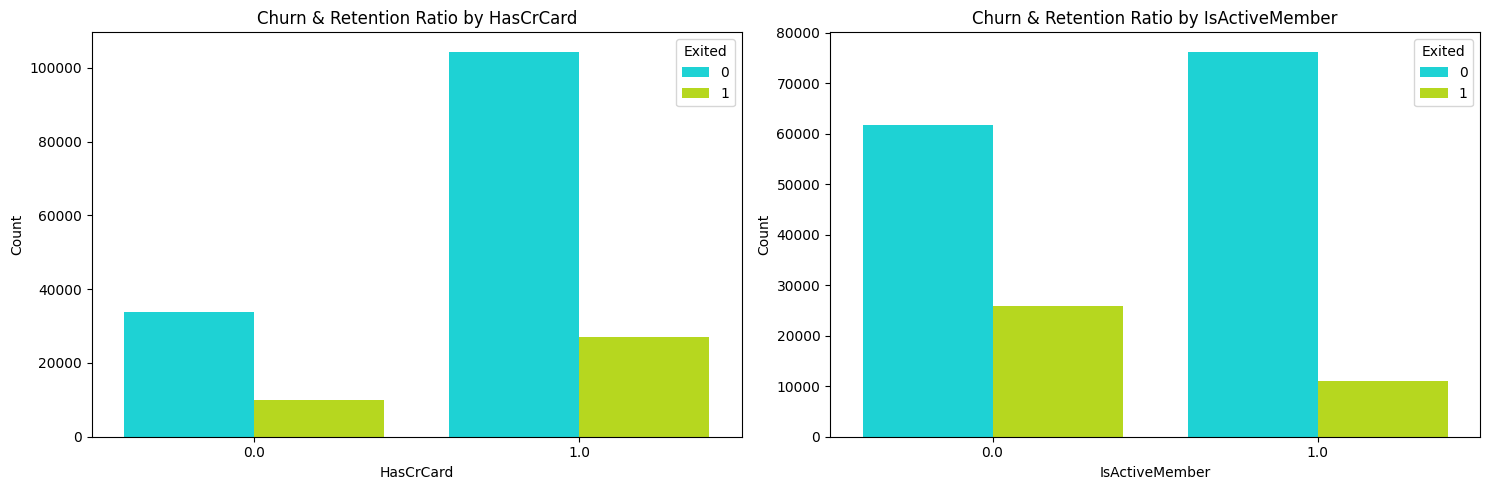

In [31]:
colors = ['#00F0F2', '#CAF600']

# Select three categorical features
categorical_features = ['HasCrCard', 'IsActiveMember']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Exited', data=train, palette=colors, ax=axes[i])
    axes[i].set_title(f'Churn & Retention Ratio by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


> - Churn rate is not related to the 'Has Credit Card or Not'.
>
> - Churn rate is high in non-active members as compared to the active members.

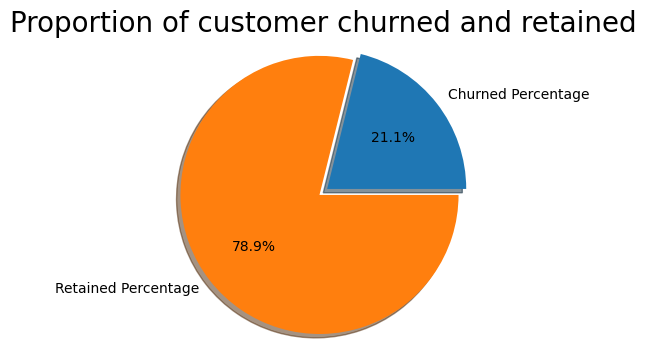

In [32]:
labels = ['Churned Percentage', 'Retained Percentage']
sizes = [train.Exited[train['Exited']==1].count(), train.Exited[train['Exited']==0].count()]
explode = (0, 0.07)
fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

> - Overall curned percentage is around 21%.
>
> - Overall retention percentage is around 79%.

&emsp;**Study the Continuous Features w.r.t Target Feature**

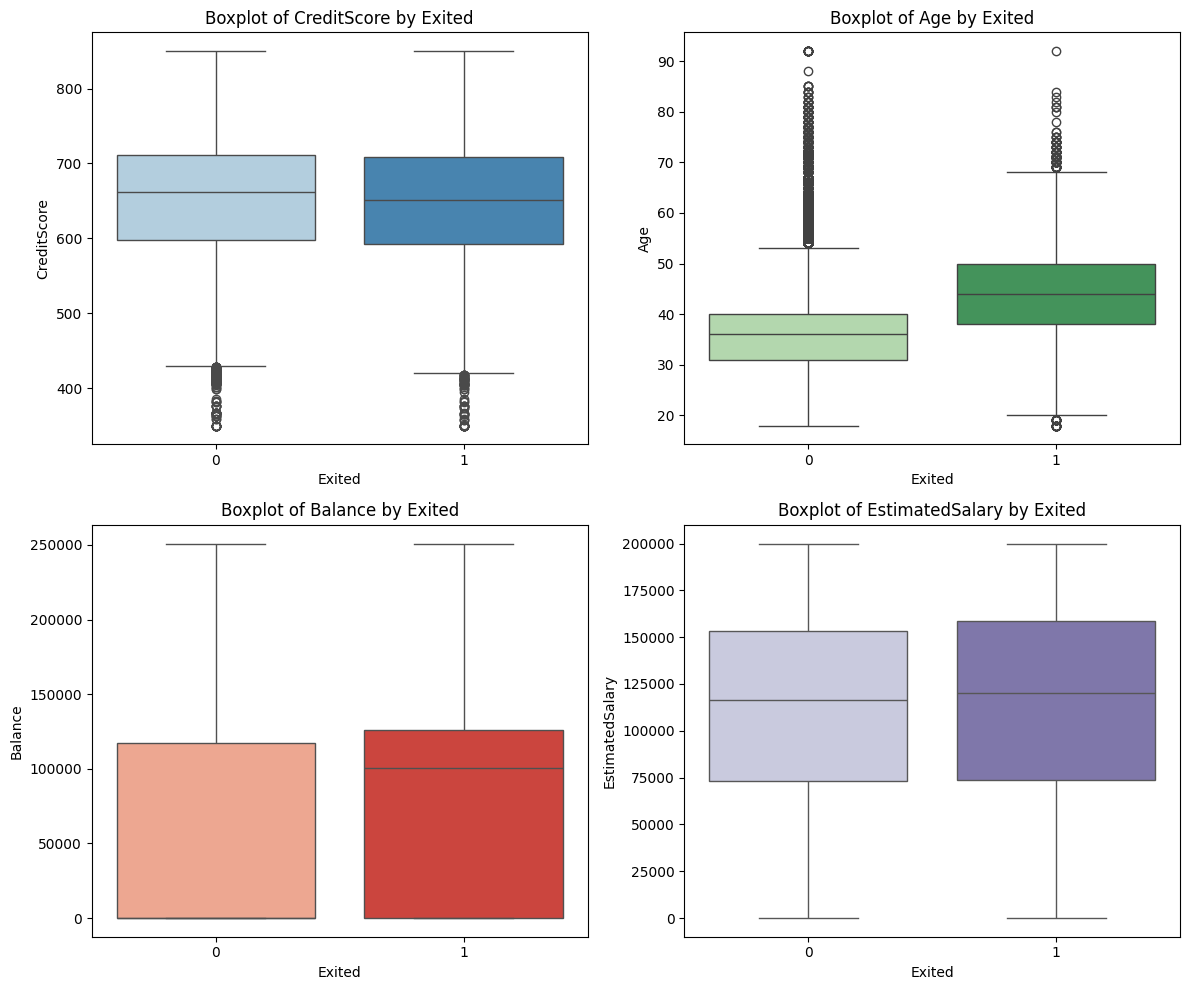

In [33]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array to facilitate indexing
axes = axes.flatten()

# Define different color palettes for each boxplot
color_palettes = ['Blues', 'Greens', 'Reds', 'Purples']

# Loop through each numerical feature and create a boxplot with different colors
for i, (feature, palette) in enumerate(zip(numerical_features, color_palettes)):
    sns.boxplot(x='Exited', y=feature, data=train, ax=axes[i], palette=palette)
    axes[i].set_title(f'Boxplot of {feature} by Exited')
    axes[i].set_xlabel('Exited')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


> - No significant difference in the distributions of [`CredicScore`, `Balance`, `EstimatedSalary`] of `Exited` & `Not Exited` costomers.
>
> - The `churn rate` of aged costumers is `higher than` younger costomers.


In [34]:
churn_data = train.groupby(['Tenure', 'Exited']).size().unstack()
churn_data = churn_data.T
churn_data

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,4049,13773,15376,13616,14366,14271,13448,15320,14880,13936,5041
1,1371,4022,3717,4023,4177,4009,3341,3518,3665,3757,1358


In [35]:
churn_percentages = churn_data / churn_data.sum() * 100
churn_percentages.T

Exited,0,1
Tenure,,
0,74.704797,25.295203
1,77.398146,22.601854
2,80.532132,19.467868
3,77.192585,22.807415
4,77.473979,22.526021
5,78.068928,21.931072
6,80.100066,19.899934
7,81.324981,18.675019
8,80.237261,19.762739


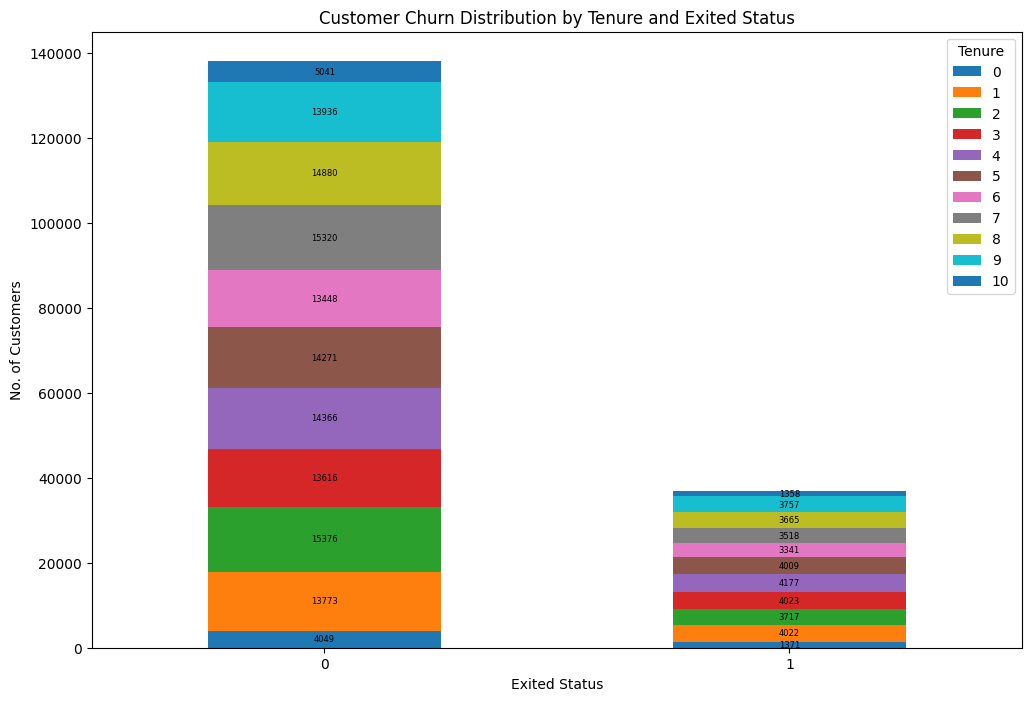

In [36]:
ax = churn_data.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set_title('Customer Churn Distribution by Tenure and Exited Status')
ax.set_xlabel('Exited Status')
ax.set_ylabel('No. of Customers')

plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=6, color='black')
plt.show()

> - The `churn rate is very low` in every year `as compared to the retention rate`.
>
> - The churn rate in year `0 & 10` is low.
>
> - The churn rate in the years `1 to 9` is significantly equal.

### **Apply the following ML & DL Models**

> 1. **Random Forest**
> 
> 2. **Extra Gradient Bossting**
> 3. **CatBoost**
> 4. **LightGBM**
> 5. **Neural Network**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [38]:
# Creating a dictionary to store the metrics
metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

def assigning_metric_scores(model_name, y_test, y_pred):
    model = model_name
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_dict['Model'].append(model)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

def print_report_matrix(model_name, y_test, y_pred):
    c_report = classification_report(y_test, y_pred)
    print(f"\nClassification Report of {model_name}:\n\n{c_report}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [39]:
# create a function to apply the model to the dataset
def apply_model(model, df):
    X = train.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
    y = train['Exited']

    cat_cols = ['Geography', 'Gender']

    # Apply label encoder to the categorical columns
    le = LabelEncoder()
    X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_name = type(model).__name__
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    assigning_metric_scores(model_name, y_test, y_pred)
    print_report_matrix(model_name, y_test, y_pred)

### **Random Forest**



Classification Report of RandomForestClassifier:



              precision    recall  f1-score   support



           0       0.88      0.95      0.91     27625

           1       0.73      0.52      0.60      7382



    accuracy                           0.86     35007

   macro avg       0.80      0.73      0.76     35007

weighted avg       0.85      0.86      0.85     35007




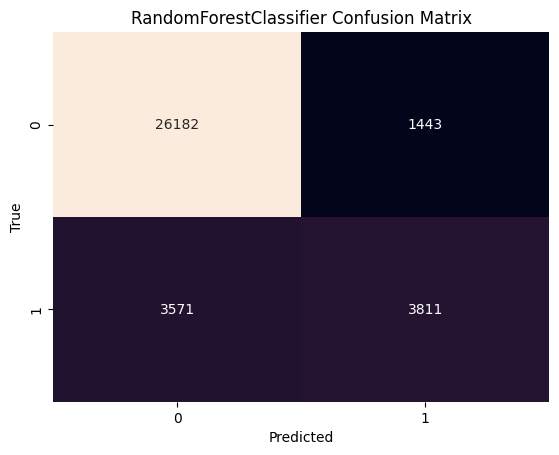

In [40]:
apply_model(RandomForestClassifier(random_state=42, class_weight='balanced'), train)

### **Extra Gradient Boosting**



Classification Report of XGBClassifier:



              precision    recall  f1-score   support



           0       0.89      0.95      0.92     27625

           1       0.74      0.56      0.64      7382



    accuracy                           0.87     35007

   macro avg       0.82      0.75      0.78     35007

weighted avg       0.86      0.87      0.86     35007




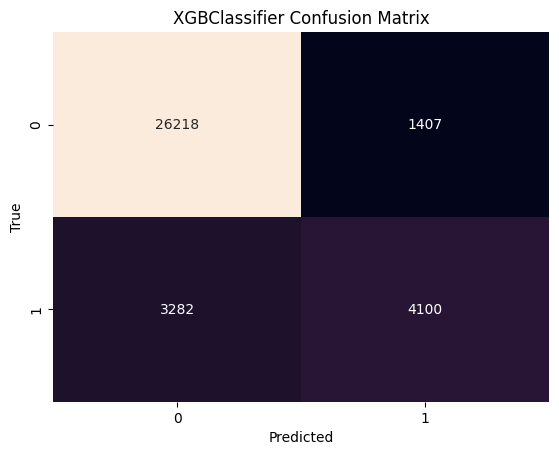

In [41]:
apply_model(XGBClassifier(random_state=42), train)

### **CatBoost Model**



Classification Report of CatBoostClassifier:



              precision    recall  f1-score   support



           0       0.89      0.95      0.92     27625

           1       0.76      0.55      0.64      7382



    accuracy                           0.87     35007

   macro avg       0.82      0.75      0.78     35007

weighted avg       0.86      0.87      0.86     35007




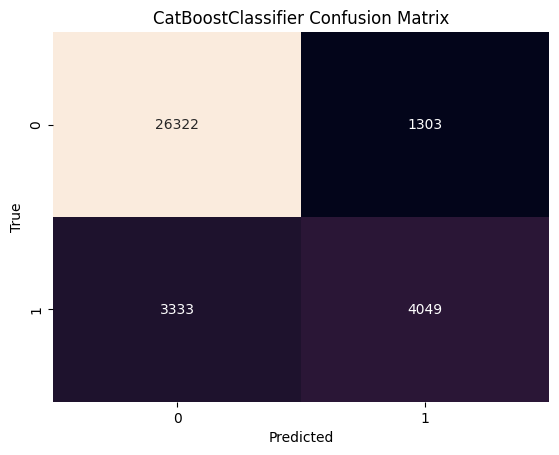

In [42]:
apply_model(CatBoostClassifier(random_state=42, verbose=False), train)

### **Light Gradient Boosting Machine (LGBM)**



Classification Report of LGBMClassifier:



              precision    recall  f1-score   support



           0       0.89      0.95      0.92     27625

           1       0.75      0.54      0.63      7382



    accuracy                           0.87     35007

   macro avg       0.82      0.75      0.77     35007

weighted avg       0.86      0.87      0.86     35007




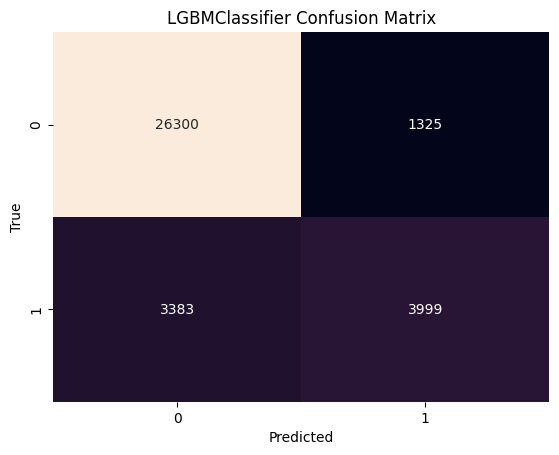

In [43]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
apply_model(LGBMClassifier(random_state=42, **params, verbose=-1), train)

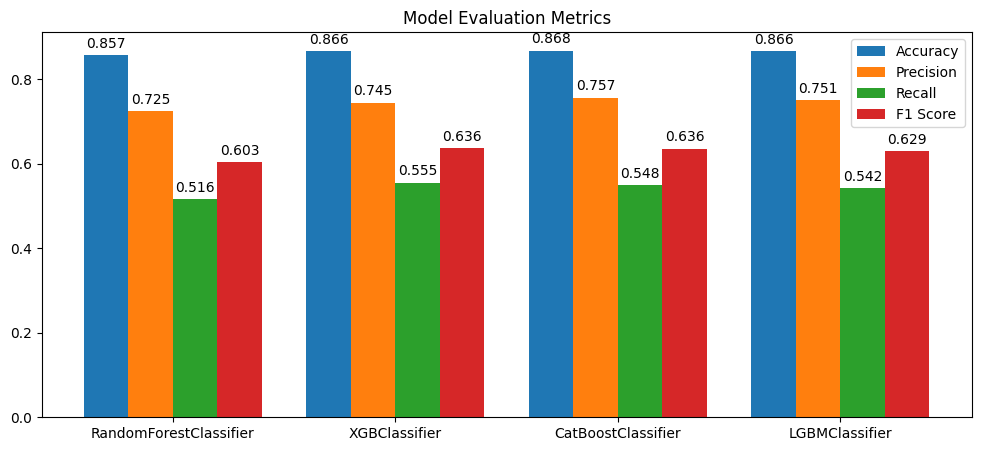

In [44]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 5))

bar_width = 0.2
bar_positions = np.arange(len(metrics_dict['Model']))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    bars = ax.bar(bar_positions + i * bar_width, metrics_dict[metric], bar_width, label=metric)
    
    # Display values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    ax.set_xticks(bar_positions + 1.5 * bar_width)
    ax.set_xticklabels(metrics_dict['Model'])
ax.legend()

plt.title('Model Evaluation Metrics')
plt.show()


> - **`CatBoostClassifier` performed little better than othar Classifiers.**

### **Neural Network**

Epoch 1/50

4376/4376 [==============================] - 31s 7ms/step - loss: 0.3406 - accuracy: 0.8557 - val_loss: 0.3270 - val_accuracy: 0.8640

Epoch 2/50

4376/4376 [==============================] - 53s 12ms/step - loss: 0.3275 - accuracy: 0.8625 - val_loss: 0.3279 - val_accuracy: 0.8623

Epoch 3/50

4376/4376 [==============================] - 63s 14ms/step - loss: 0.3263 - accuracy: 0.8627 - val_loss: 0.3239 - val_accuracy: 0.8649

Epoch 4/50

4376/4376 [==============================] - 63s 14ms/step - loss: 0.3253 - accuracy: 0.8634 - val_loss: 0.3247 - val_accuracy: 0.8645

Epoch 5/50

4376/4376 [==============================] - 61s 14ms/step - loss: 0.3246 - accuracy: 0.8637 - val_loss: 0.3242 - val_accuracy: 0.8650

Epoch 6/50

4376/4376 [==============================] - 61s 14ms/step - loss: 0.3241 - accuracy: 0.8641 - val_loss: 0.3230 - val_accuracy: 0.8657

Epoch 7/50

4376/4376 [==============================] - 62s 14ms/step - loss: 0.3238 - accuracy: 0.8638 - val_lo

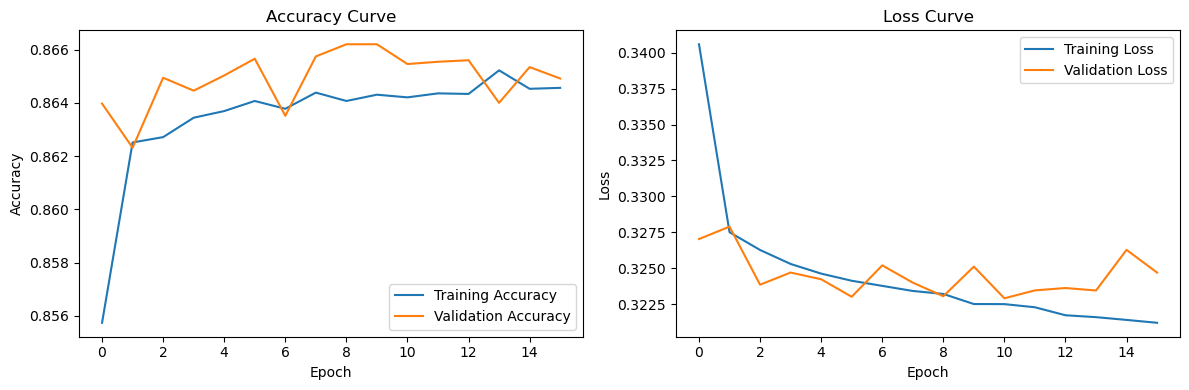

CPU times: total: 17min 48s

Wall time: 16min 7s


In [7]:
%%time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Assuming X and y are your feature matrix and target vector
X = train.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
y = train['Exited']

cat_cols = ['Geography', 'Gender']
# Apply label encoder to the categorical columns
le = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simple neural network using Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and collect training history for plotting
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                        validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Plot the accuracy and loss curves
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy curve
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Curve')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss curve
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Curve')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

> - **`CatBoostClassifier` results still better than `Neural Network`.**

### **Train the CatBoost on the `train` & Predict with `test`.**

In [45]:
train.sample()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
66025,15727361,Lu,508,France,Female,38.0,6,0.0,2,1.0,1.0,100940.91,0


In [46]:
test.sample()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
24467,15782758,Yudina,643,Germany,Male,40.0,1,146853.52,1,0.0,0.0,131300.27


In [47]:
train.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
test.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [48]:
cat_features = train.select_dtypes(include=['object']).columns

lable_encoder = LabelEncoder()
for col in cat_features:
    train[col] = lable_encoder.fit_transform(train[col])
    test[col] = lable_encoder.transform(test[col])


In [49]:
# Apply the catboost classifier to the training data
X_train =  train.drop('Exited', axis=1)
y_train = train['Exited']

cat_model = CatBoostClassifier(random_state=42, verbose=False)
cat_model.fit(X_train, y_train)

# Make predictions on the test data
X_test = test
y_pred = cat_model.predict_proba(X_test)

### **Create the Submission File**

In [230]:
submission['Exited'] = y_pred[:, 1]
submission.to_csv('submission.csv', index=False)